In [10]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=142020 sha256=762b71024c23a8aa60bbd46d0e8fdc03c4ad69b36c0b5dcd257e8bbb84069191
  Stored in directory: /tmp/pip-ephem-wheel-cache-zsslkqyj/wheels/a5/b6/52/18c617da8ab7981501f28a49d398fa4ccca532d1baece44b1e
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may 

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

# Temporal Network Analysis: High School Dataset, Interactions among Students

First, we download and parse the [High School 2013 dataset](http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks/). It is the temporal network of interactions between students of 5 classes during 7 days in a high school in Marseille, France in 2013. An interaction consists in a physical proximity between two students, captured by a sensor.

In [3]:
import numpy
T = [0, 50]
nb_node = 25
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 3
presence_param_node = 25

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 5
presence_param_link = 3
p_link = numpy.sqrt(nb_node)/nb_node
S = sg.erdos_renyi(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    p_link)
S.describe()

Nb of Nodes :  25
Nb of segmented nodes :  35.0
Nb of links :  47
Nb of segmented links :  110.0
Nb of event times :  231


<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


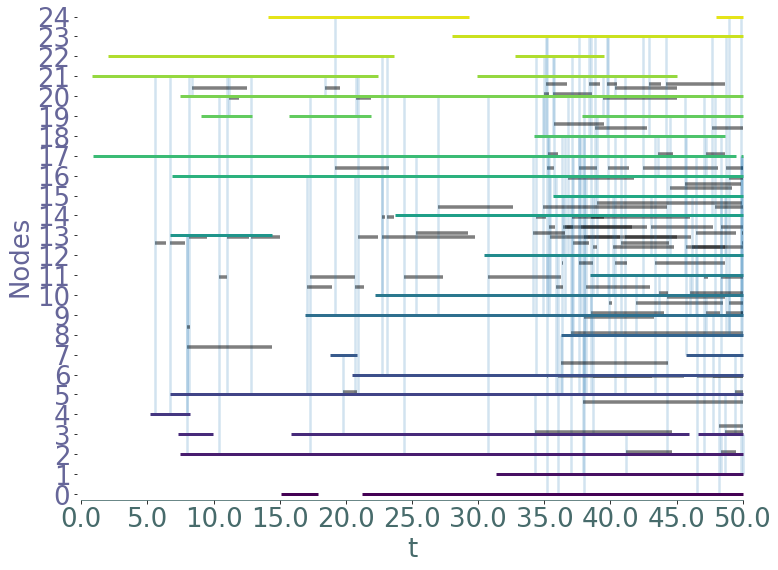

In [4]:
S.plot()

In [5]:
import straph.betweenness as bt
bet, contri, nouveau, events= bt.betweenness_all(S)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


Let's print a short description of this dataset.

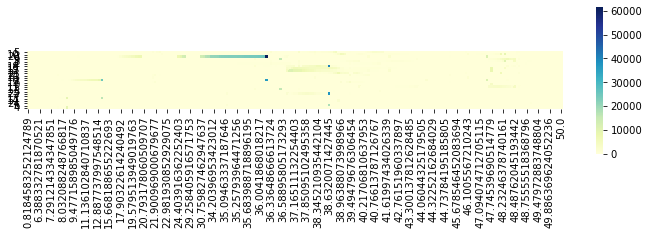

In [6]:
ax = bt.heatmap_betweenness(nouveau, events, bet, square = True)
fig = ax.get_figure()
fig.savefig("out.png") 

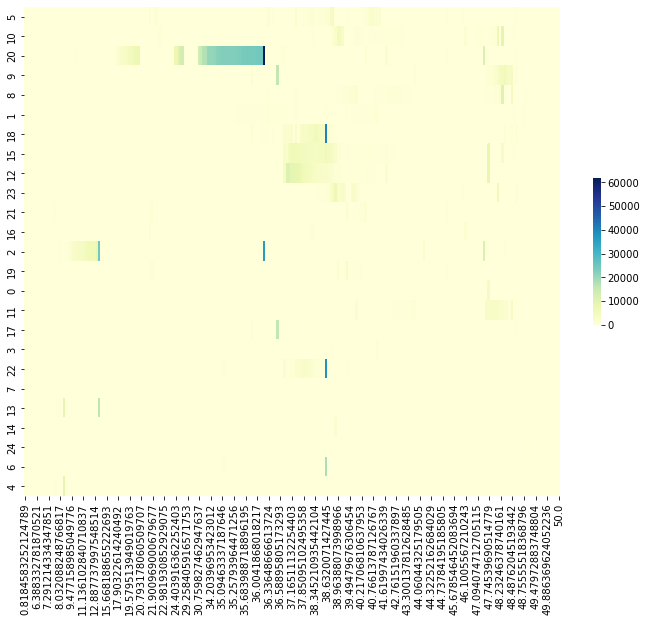

In [7]:
ax = bt.heatmap_betweenness(nouveau, events, bet, square = False)
fig = ax.get_figure()
fig.savefig("out.png") 

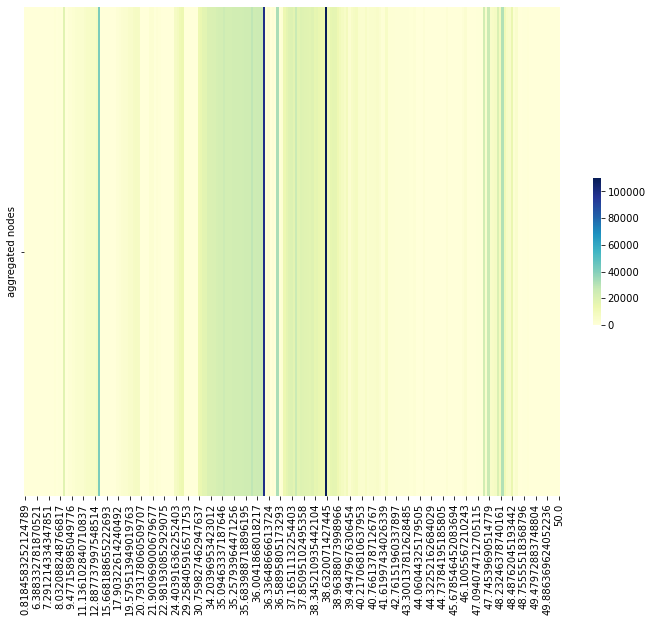

In [9]:
bt.aggregated_time_betweenness(nouveau, events, bet, square = False)
fig = ax.get_figure()
fig.savefig("out.png") 

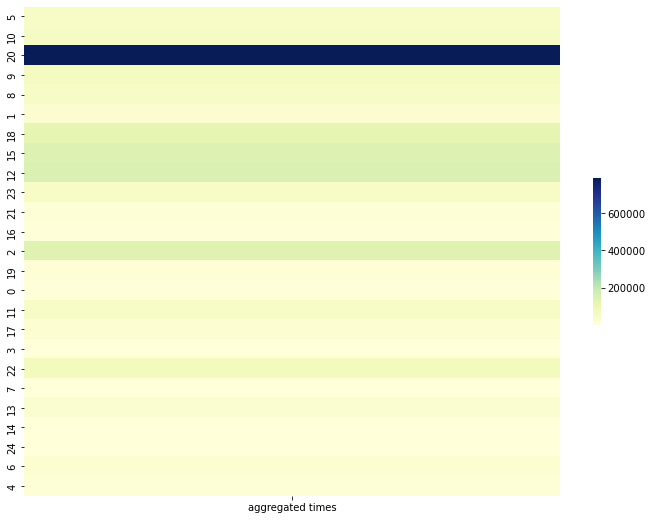

In [12]:
ax = bt.aggregated_node_betweenness(nouveau, events, bet, square = False)
fig = ax.get_figure()
fig.savefig("out.png") 

There's $327$ students interacting $46025$ times among each other at $7360$ distinct event times. Let's learn more.

In [19]:
T = [0, 100]
nb_node = 30
occurrence_law_node = 'poisson'
presence_law_node = 'uniform'

occurrence_param_node = 3
presence_param_node = 25

occurrence_law_link = 'poisson'
presence_law_link = 'uniform'

occurrence_param_link = 5
presence_param_link = 15


m0 = 3
m = 3

In [20]:
S = sg.barabasi_albert(T,
                    nb_node,
                    occurrence_law_node,
                    occurrence_param_node,
                    presence_law_node,
                    presence_param_node,
                    occurrence_law_link,
                    occurrence_param_link,
                    presence_law_link,
                    presence_param_link,
                    m0,
                    m)
S.describe()

Nb of Nodes :  30
Nb of segmented nodes :  56.0
Nb of links :  81
Nb of segmented links :  158.0
Nb of event times :  282


In [21]:
import straph.betweenness as bt
bet, contri, nouveau, events= bt.betweenness_all(S)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


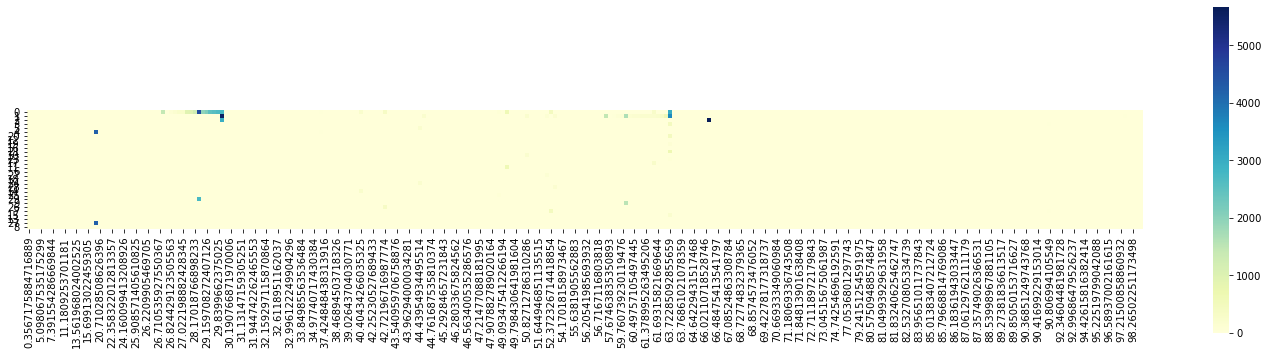

In [22]:
ax = bt.heatmap_betweenness(nouveau, events, bet, square = True)
fig = ax.get_figure()
fig.savefig("out.png") 